# 1変数ガウス分布(尤度関数)とNormal-gamma分布(事前分布)から事後分布と事後予測分布を求める

## 1変数ガウス分布(尤度関数)とNormal-gamma分布(事前分布)から事後分布をvariational inferenceで解くという行為について

前回の1変数正規分布モデルのvariational inferenceでは事後予測分布が導出できなかった. 途中で計算を間違えたのかもしれないし, 解析的に解けない問題だったのかもしれない.

ところであの問題だが、１変数ガウス分布, Normal-gamma分布をパラメータの事前分布とした場合のパラメータの事後分布や事後予測分布は解析的に解けるのだそうである. 解けるところを試しにvariational inferenceしてみて結果を比較したりする, というのが例題の作為であったようだ. そういう基礎的な背景があったようだ. 知らなかった.

というわけで, 普通に解いてみる.

## 事後分布

こちらが尤度と事前分布になります.

$$
\begin{eqnarray}
p\left(\boldsymbol x \mid \mu, \tau \right) &=& \prod_{i=1}^N \mathcal N \left( x_i \mid \mu, \tau^{-1} \right) \\
p\left(\mu \mid \tau\right) &=& \mathcal N \left( \mu \mid \mu_0, (\lambda_0\tau)^{-1} \right) \\
p\left(\tau\right) &=& {\rm Gamma} \left( \tau \mid \alpha_0, \beta_0 \right)
\end{eqnarray}
$$

$\mu$と$\tau$の事後分布を解く. 例によって対数にして考える.

$$
\begin{eqnarray}
p\left(\mu, \tau \mid \boldsymbol x \right) &\propto& p\left(\boldsymbol x \mid \mu, \tau \right) p\left(\mu \mid \tau\right) p\left(\tau\right)
\end{eqnarray}
$$

$$
\begin{eqnarray}
{\rm ln} \; p\left(\mu, \tau \mid \boldsymbol x \right) &=&
    {\rm ln}\;p\left(\boldsymbol x \mid \mu, \tau \right)
    + {\rm ln}\; p\left(\mu \mid \tau\right)
    + {\rm ln}\; p\left(\tau\right)
    + {\rm const} \\
&=&
    {\rm ln} \left(\prod_{i=1}^N \mathcal N \left( x_i \mid \mu, \tau^{-1} \right) \right)
    + {\rm ln} \left( \mathcal N \left( \mu \mid \mu_0, (\lambda_0\tau)^{-1} \right) \right)
    + {\rm ln} \left( {\rm Gamma} \left( \tau \mid \alpha_0, \beta_0 \right) \right)
    + {\rm const} \\
&=&
    \sum_{i=1}^N \left(\frac {1} {2}{\rm ln} \; \tau - \frac {\tau} {2} \left(x_i - \mu\right)^2\right)
    + \frac {1} {2}{\rm ln} \; \tau - \frac {\lambda_0 \tau} {2} \left(\mu - \mu_0 \right)^2
    + \left(\alpha_0 - 1\right){\rm ln} \;\tau - \beta_0\tau
    + {\rm const} \\
&=&
    \frac {N} {2}{\rm ln} \; \tau
        - \frac {\tau} {2} \sum_{i=1}^N x_i^2
        + \tau\left(\sum_{i=1}^N x_i\right)\mu
        - \frac {N\tau} {2} \mu^2
    + \frac {1} {2}{\rm ln} \; \tau
    - \frac {\lambda_0 \tau} {2} \mu^2
    + \lambda_0 \tau \mu \mu_0
    - \frac {\lambda_0 \tau} {2} \mu_0^2
    + \left(\alpha_0 - 1\right){\rm ln} \;\tau - \beta_0\tau
    + {\rm const} \\
&=&
    - \frac {\tau} {2} \left(\lambda_0 + N\right) \mu^2
    + \tau\left(N \bar x + \lambda_0 \mu_0 \right)\mu
    + \left(\frac {N - 1} {2} + \alpha_0 \right){\rm ln} \; \tau
    - \left(
        \frac {1} {2} N \bar {x^2}
        + \frac {\lambda_0} {2} \mu_0^2
        + \beta_0
    \right)\tau
    + {\rm const} \\
&=&
    \frac {1} {2}{\rm ln} \left(\tau\left( \lambda_0 + N \right)\right)
    - \frac {\tau \left(\lambda_0 + N\right)} {2} \left(
        \mu - \frac {N \bar x + \lambda_0 \mu_0}{\lambda_0 + N}
        \right)^2 \\
    &&- \frac {1} {2}{\rm ln} \left(\tau\left( \lambda_0 + N \right)\right)
    + \frac {\left(N \bar x + \lambda_0 \mu_0\right)^2}{2\left(\lambda_0 + N\right)} \tau
    + \left(\frac {N - 1} {2} + \alpha_0 \right){\rm ln} \; \tau
    - \left(
        \frac {1} {2} N \bar {x^2}
        + \frac {\lambda_0} {2} \mu_0^2
        + \beta_0
    \right)\tau
    + {\rm const} \\
&=&
    {\rm ln} \left( \mathcal N\left(
        \mu \;\middle|\;
        \frac {N \bar x + \lambda_0 \mu_0}{\lambda_0 + N},
        \; \left(\left(\lambda_0 + N\right) \tau\right)^{-1}
    \right) \right)
    + \left(\frac {N} {2} + \alpha_0 -1 \right){\rm ln} \; \tau
    - \left(
        \frac {1} {2} N \bar {x^2}
        + \frac {\lambda_0} {2} \mu_0^2
        - \frac {\left(N \bar x + \lambda_0 \mu_0\right)^2}{2\left(\lambda_0 + N\right)}
        + \beta_0
    \right)\tau
    + {\rm const} \\
&=&
    {\rm ln} \left( \mathcal N\left(
        \mu \;\middle|\;
        \frac {N \bar x + \lambda_0 \mu_0}{\lambda_0 + N},
        \; \left(\left(\lambda_0 + N\right) \tau\right)^{-1}
    \right) \right)
    + \left(\frac {N} {2} + \alpha_0 -1 \right){\rm ln} \; \tau
    - \left(
        \beta_0
        + \frac {1} {2} \sum_{i=1}^N \left(x_i - \bar x\right)^2
        + \frac {N\lambda_0\left(\bar x - \mu_0 \right)^2} {2\left(\lambda_0 + N\right)}
    \right)\tau
    + {\rm const} \\
&=&
    {\rm ln} \left( \mathcal N\left(
        \mu \;\middle|\;
        \frac {N \bar x + \lambda_0 \mu_0}{\lambda_0 + N},
        \; \left(\left(\lambda_0 + N\right) \tau\right)^{-1}
    \right) \right)
    + {\rm ln} \left( {\rm Gamma}\left(
        \tau \;\middle|\;
        \frac {N} {2} + \alpha_0 , \;
        \beta_0
        + \frac {1} {2} \sum_{i=1}^N \left(x_i - \bar x\right)^2
        + \frac {N\lambda_0\left(\bar x - \mu_0 \right)^2} {2\left(\lambda_0 + N\right)}
    \right) \right) \\
\end{eqnarray}
$$

$$
p\left( \mu, \tau \mid \boldsymbol x \right)= \mathcal N\left(
        \mu \;\middle|\;
        \frac {N \bar x + \lambda_0 \mu_0}{\lambda_0 + N},
        \; \left(\left(\lambda_0 + N\right) \tau\right)^{-1}
    \right)
    {\rm Gamma}\left(
        \tau \;\middle|\;
        \frac {N} {2} + \alpha_0 , \;
        \beta_0
        + \frac {1} {2} \sum_{i=1}^N \left(x_i - \bar x\right)^2
        + \frac {N\lambda_0\left(\bar x - \mu_0 \right)^2} {2\left(\lambda_0 + N\right)}
    \right)
$$

解けた.

ちなみに上のような$\mu$, $\tau$の事前分布/事後分布の形を[Normal-gamma分布](https://en.wikipedia.org/wiki/Normal-gamma_distribution)という.

## 事後予測分布を解く準備

続いて事後予測分布を解くのだが, その前にMurphy, K. P. (2007). "Conjugate Bayesian analysis of the Gaussian distribution."を参考に$p(\boldsymbol x)$を解く. これを解いておくと事後予測分布を解くのが楽になる. また, ここでの$p(\boldsymbol x)$の解き方は非常に参考になる.

まず, Normal-gamma分布とガウス分布について, 正規化項を除いた$\mu$と$\tau$に依存する部分を表す関数$NG'(\mu, \tau \mid \mu, \lambda, \alpha, \beta)$と$N'(x \mid \mu, \tau^{-1})$を導入する. また, Normal-gamma分布の正規化項として$Z_{NG(\mu, \lambda, \alpha, \beta)}$を導入する. ガウス分布の正規化項は$1/\sqrt{2\pi}$である.

$$
\begin{eqnarray}
p\left(\mu, \tau \right) &=& \frac {1} {Z_{0}} NG'\left(\mu, \tau | \mu_0, \lambda_0, \alpha_0, \beta_0\right) \\
Z_{0} &=&
    \left(\frac {2\pi}{\lambda_0}\right)^{\frac {1} {2}}
    \frac {\Gamma\left(\alpha_0\right)} {\beta_0^{\alpha_0}} \\
p\left(\mu, \tau \mid \boldsymbol x \right) &=& \frac {1} {Z_{N}} NG'\left(\mu, \tau | \mu_N, \lambda_N, \alpha_N, \beta_N\right) \\
Z_{N} &=&
    \left(\frac {2\pi} {\lambda_N}\right)^{\frac {1} {2}}
    \frac {\Gamma\left(\alpha_N\right)} {\beta_N^{\alpha_N}}\\
p\left(\boldsymbol x \mid \mu, \tau \right) &=& \left(\frac {1} {2\pi} \right)^{\frac{N} {2}} \prod_{i=1}^N N'\left(x_i \mid \mu, \tau^{-1}\right) \\
\mu_N &=& \frac {N \bar x + \lambda_0 \mu_0}{\lambda_0 + N} \\
\lambda_N &=& \lambda_0 + N\\
\alpha_N &=& \frac {N} {2} + \alpha_0 \\
\beta_N &=& \beta_0
        + \frac {1} {2} \sum_{i=1}^N \left(x_i - \bar x\right)^2
        + \frac {N\lambda_0\left(\bar x - \mu_0 \right)^2} {2\left(\lambda_0 + N\right)}
\end{eqnarray}
$$

以下のように$p(\boldsymbol x)$を導出する. このとき, $\mu$や$\tau$に依存する項は割って1にならなければならないところがミソである(3行目).

$$
\begin{eqnarray}
p\left(\boldsymbol x \right) &=& 
    \frac
        {p\left( \mu, \tau\right) p\left(\boldsymbol x \mid \mu, \tau\right)}
        {p\left(\mu, \tau \mid \boldsymbol x \right)} \\
&=& \frac
    { \frac {1} {Z_{0}} NG'\left(\mu, \tau | \mu_0, \lambda_0, \alpha_0, \beta_0\right)
    \left(\frac {1} {2\pi} \right)^{\frac{N} {2}} \prod_{i=1}^N N'\left(x_i \mid \mu, \tau^{-1}\right)}
    {\frac {1} {Z_{N}} NG'\left(\mu, \tau | \mu_N, \lambda_N, \alpha_N, \beta_N\right)} \\
&=& 
    \frac {Z_N} {Z_0}
    \left(\frac {1} {2\pi} \right)^{\frac{N} {2}} 
    \frac{
        NG'\left(\mu, \tau | \mu_0, \lambda_0, \alpha_0, \beta_0\right)
        \prod_{i=1}^N N'\left(x_i \mid \mu, \tau^{-1}\right)}
        {NG'\left(\mu, \tau | \mu_N, \lambda_N, \alpha_N, \beta_N\right)
    } \\
&=& 
    \frac {Z_N} {Z_0}
    \left(\frac {1} {2\pi} \right)^{\frac{N} {2}} \\
&=& 
    \frac {\Gamma\left(\alpha_N\right)} {\Gamma\left(\alpha_0\right)}
    \frac {\beta_0^{\alpha_{0}}} {\beta_N^{\alpha_{N}}}
    \left(\frac {\lambda_0} {\lambda_N} \right)^{\frac{1} {2}}
    \left(\frac {1} {2\pi} \right)^{\frac{N} {2}}
\end{eqnarray}
$$

ベイズ統計で尤度と事前分布の積の対数をとって, 定数項=正規化係数を無視して式形からパラメータの事後分布を求めるのは定番のテクニックだと思う. 初めて見たときは感動すら覚えた.

これを逆に考えると, 正規化係数のみに着目すればベイズの定理の右辺の分母 $p(\boldsymbol x)$ が簡単に導出できるのである. たしかに言われてみればその通りであるがすごい.

## 事後予測分布

それではある一つのデータ$\hat x$についての事後予測分布を解く.

$$
\begin{eqnarray}
p\left( \hat x \mid \boldsymbol x \right)
&=& \frac
    {p\left(\hat x, \boldsymbol x \right)}
    {p\left(\boldsymbol x \right)} \\
&=& \frac
    {
        \frac {\Gamma\left(\alpha_{N+1}\right)} {\Gamma\left(\alpha_0\right)}
        \frac {\beta_0^{\alpha_{0}}} {\beta_{N+1}^{\alpha_{{N+1}}}}
        \left(\frac {\lambda_0} {\lambda_{N+1}} \right)^{\frac{1} {2}}
        \left(\frac {1} {2\pi} \right)^{\frac{{N+1}} {2}}
    }
    {
        \frac {\Gamma\left(\alpha_N\right)} {\Gamma\left(\alpha_0\right)}
        \frac {\beta_0^{\alpha_{0}}} {\beta_N^{\alpha_{N}}}
        \left(\frac {\lambda_0} {\lambda_N} \right)^{\frac{1} {2}}
        \left(\frac {1} {2\pi} \right)^{\frac{N} {2}}
    } \\
&=&
    \frac {\Gamma\left(\alpha_{N+1}\right)} {\Gamma\left(\alpha_N\right)}
    \frac {\beta_N^{\alpha_{N}}} {\beta_{N+1}^{\alpha_{{N+1}}}}
    \left(\frac {\lambda_N} {\lambda_{N+1}} \right)^{\frac{1} {2}}
    (2\pi)^{-\frac {1} {2}}
\end{eqnarray}
$$

$\lambda_{N+1}, \alpha_{N+1}, \beta_{N+1}$が出てきた. これらは$p(\mu, \tau \mid \hat x, \boldsymbol x) \propto p(\hat x \mid \mu, \tau) p(\mu, \tau \mid \boldsymbol x)$が簡単に示されるのでここから次のように得られる.

$$
\begin{eqnarray}
\lambda_{N+1} &=& \lambda_N + 1 \\
\alpha_{N+1} &=& \alpha_N + \frac {1} {2}\\
\beta_{N+1} &=& \beta_N
    + \frac {1} {2} \sum_{i=1}^1 \left(\hat x_i - \bar {\hat x}\right)^2
    + \frac {1\lambda_N\left(\bar {\hat x} - \mu_N \right)^2} {2\left(\lambda_N + 1\right)} \\
&=& \beta_N
    + \frac {\lambda_N\left(\hat x - \mu_N \right)^2} {2\left(\lambda_N + 1\right)}
\end{eqnarray}
$$

つづき.

$$
\begin{eqnarray}
p\left( \hat x \mid \boldsymbol x \right)
&=&
    \frac {\Gamma\left(\alpha_{N+1}\right)} {\Gamma\left(\alpha_N\right)}
    \frac {\beta_N^{\alpha_{N}}} {\beta_{N+1}^{\alpha_{{N+1}}}}
    \left(\frac {\lambda_N} {\lambda_{N+1}} \right)^{\frac{1} {2}}
    \frac {1} {2\pi} \\
&=&
    \frac {\Gamma\left(\alpha_{N} + \frac {1} {2}\right)} {\Gamma\left(\alpha_N\right)}
    \frac {\beta_N^{\alpha_{N}}} {\left(\beta_{N} + \frac {\lambda_N\left(\hat x - \mu_N\right)^2} {2\left(\lambda_N + 1\right)}\right)^{\alpha_{N} + \frac {1} {2}}}
    \left(\frac {\lambda_N} {\lambda_{N}+1} \right)^{\frac{1} {2}}
    (2\pi)^{-\frac {1} {2}} \\
&=&
    \frac {\Gamma\left(\frac {2\alpha_{N} + 1} {2}\right)} {\Gamma\left(2\alpha_N\right)}
    \left(
        \frac {\beta_N} {\left(\beta_{N} + \frac {\lambda_N\left(\hat x - \mu_N\right)^2} {2\left(\lambda_N + 1\right)}\right)}
    \right)^{\alpha_{N} + \frac {1} {2}}
    \beta_N^{-\frac{1}{2}}
    \left(\frac {\lambda_N} {\lambda_{N}+1} \right)^{\frac{1} {2}}
    (2\pi)^{-\frac {1} {2}} \\
&=&
    \pi^{-\frac {1} {2}}
    \frac {\Gamma\left(\frac {2\alpha_{N} + 1} {2}\right)} {\Gamma\left(\frac {2\alpha_N} {2} \right)}
    \left(
        1 + \frac {\lambda_N\left(\hat x - \mu_N\right)^2} {2\beta_N\left(\lambda_N + 1\right)}
    \right)^{-\left(\frac {2\alpha_{N} + 1} {2}\right)}
    \left(\frac {\alpha_N \lambda_N} {2\alpha_N\beta_N \left(\lambda_{N}+1\right)} \right)^{\frac{1} {2}} \\
&=&
    \pi^{-\frac {1} {2}}
    \frac {\Gamma\left(\frac {2\alpha_{N} + 1} {2}\right)} {\Gamma\left(\frac {2\alpha_N} {2} \right)}
    \left(
        1 + \frac {\Lambda\left(\hat x - \mu_N\right)^2} {2\alpha_N}
    \right)^{-\left(\frac {2\alpha_{N} + 1} {2}\right)}
    \left(\frac {\Lambda} {2\alpha_N}\right)^{\frac{1} {2}} \\
\end{eqnarray}
$$

ただし, 

$$
\Lambda = \frac {\alpha_N \lambda_N} {\beta_n\left(\lambda_N + 1 \right)}
$$

$p\left( \hat x \mid \boldsymbol x \right)$が解けた. これがなにかというと, 自由度$2\alpha_N$, 精度$\Lambda$, 平均$\mu_N$の[Studentのt分布](https://en.wikipedia.org/wiki/Student%27s_t-distribution#In_terms_of_inverse_scaling_parameter_%CE%BB)である.

$$
p(x|\nu,\mu,\lambda) = \frac{\Gamma(\frac{\nu + 1}{2})}{\Gamma(\frac{\nu}{2})} \left(\frac{\lambda}{\pi\nu}\right)^{\frac{1}{2}} \left(1+\frac{\lambda(x-\mu)^2}{\nu}\right)^{-\frac{\nu+1}{2}}
$$

事後予測分布も解けた. すごい.

何がすごいかというと, 面倒くさそうな積分 $p(\hat x \mid \boldsymbol x) = \int p(\hat x \mid \mu, \tau)p(\mu, \tau \mid \boldsymbol X) {\rm d}\mu{\rm d}\tau$を解くことなく事後予測分布が得られたことである.

## パラメータの事後分布の可視化

可視化してみる, 前回のVariational inferenceの結果とも比較する.

In [1]:
import numpy as np
import scipy as sp
from scipy import stats

import pandas as pd
pd.set_option('display.width', 200)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import base64
from itertools import chain
import tempfile
import os
import subprocess
import warnings
warnings.filterwarnings('ignore')

import sympy
import sympy.stats
%matplotlib inline

In [2]:
# test data
X = pd.DataFrame([1.1, 1.0, 1.3])
N = X.size
meanX = X.mean()[0]

# parameters of prior
mu0 = 0
lambda0 = 1
a0 = 1
b0 = 1

# parameters of posterior
muN = (N * meanX + lambda0 * mu0) / (lambda0 + N)
lambdaN = lambda0 + N
aN = N / 2. + a0
bN = b0 + 1./2. * X.apply(lambda x: np.power(x - meanX, 2.)).sum()[0] \
    + N * lambda0 * np.power(meanX - mu0, 2.) / 2. / (lambda0 + N)
print(muN, lambdaN, aN, bN)

0.8500000000000001 4 2.5 1.5050000000000003


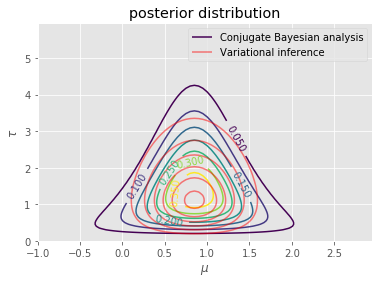

In [3]:
# grid
delta = 0.05
x = np.arange(-1.0, 3.0, delta)
y = np.arange(0.0, 6.0, delta)
X, Y = np.meshgrid(x, y)

# posterior distribution
q_mu = lambda x, y: sp.stats.norm.pdf(x, muN, np.sqrt(1./(lambdaN*y)))
q_tau = lambda y: sp.stats.gamma.pdf(y, a=aN, scale=1/bN)
f = lambda x,y: q_mu(x, y) * q_tau(y)
Z = f(X, Y)

# posterior distribution with Variational inference
muN_vi, lambdaN_vi, aN_vi, bN_vi = 0.8500000000000001, 6.644514934162626, 3.0, 1.8060009073502514
q_mu_vi = lambda x: sp.stats.norm.pdf(x, muN_vi, np.sqrt(1/(lambdaN_vi)))
q_tau_vi = lambda x: sp.stats.gamma.pdf(x, a=aN_vi, scale=1/bN_vi)
f_vi = lambda x,y: q_mu_vi(x) * q_tau_vi(y)
Z_vi = f_vi(X, Y)

# plot
cs = plt.contour(X, Y, Z)
cs_vi = plt.contour(X, Y, Z_vi, colors='red', alpha=0.5)
plt.clabel(cs, inline=1, fontsize=10)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\tau$')
plt.title('posterior distribution')

lines = [cs.collections[0], cs_vi.collections[0]]
labels = ['Conjugate Bayesian analysis','Variational inference']
plt.legend(lines, labels)
plt.savefig("1.png")

## 事後予測分布の可視化

解析的に得られた事後予測分布とサンプリングによる事後予測分布を比較する.

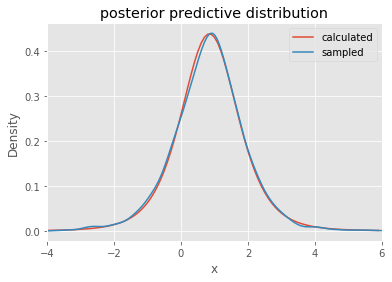

In [4]:
precision = aN * lambdaN / bN / (lambdaN + 1.)

# grid
delta = 0.1
df = pd.DataFrame()
df['X'] = np.arange(-4.0, 6.0, delta)

# posterior predicitive distribution
df['calculated'] = sp.stats.t.pdf(df.X, df=2.*aN, loc=muN, scale=np.sqrt(1/precision))

# sampled posterior predictive distribution
tau = np.random.gamma(aN, 1/bN, 2000)
mu = np.random.normal(muN, np.sqrt(1./lambdaN/tau))
sampled = pd.DataFrame(np.random.normal(mu, np.sqrt(1/tau)), columns=['sampled'])

# plot
ax = df.plot(x='X', y='calculated')
sampled.plot.kde(ax=ax)
ax.set_xlim(-4, 6)
ax.set_xlabel('x')
ax.set_ylabel(r'Density')
ax.set_title('posterior predictive distribution')
plt.savefig("2.png");

だいたい一致. よさそう.